In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [2]:
#load the dataset
df=pd.read_csv('tips.csv')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
#checking for possiple null values
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [5]:
#checking duplicates
df.duplicated().sum()

1

In [6]:
#removing duplicates
df = df.drop_duplicates()
df.duplicated().sum() 

0

In [7]:
# importing LabelEncoder and Transform categorical values to numerical values
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df['sex']=LE.fit_transform(df['sex'])
df['time']=LE.fit_transform(df['time'])
df['day']=LE.fit_transform(df['day'])


0      2
1      2
2      2
3      2
4      2
      ..
239    1
240    1
241    1
242    1
243    3
Name: day, Length: 243, dtype: int32

In [8]:
#Define feature variables x and target variable y
x=df[['total_bill','sex','day','time']]
y=df['tip']

<Axes: xlabel='total_bill', ylabel='tip'>

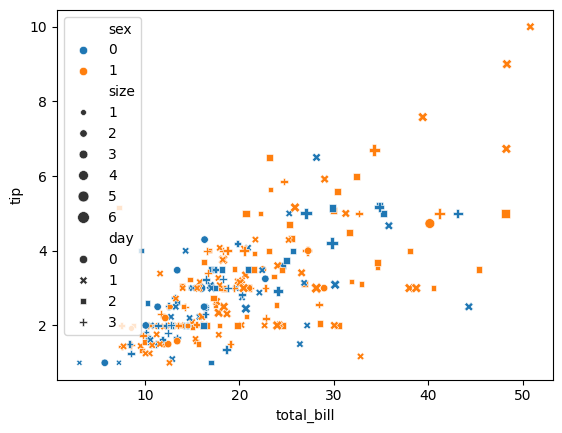

In [9]:
#plotting
sns.scatterplot(df,x='total_bill', y="tip",hue='sex',style='day',size='size')

In [10]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243 entries, 0 to 243
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  243 non-null    float64
 1   sex         243 non-null    int32  
 2   day         243 non-null    int32  
 3   time        243 non-null    int32  
dtypes: float64(1), int32(3)
memory usage: 6.6 KB


In [11]:
# Import necessary modules for model training and polynomial feature transformation
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Initialize PolynomialFeatures to create polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
x_poly = poly.fit_transform(x)

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_poly, y, train_size=0.8, random_state=43)

In [12]:
# Initializing, Training and predicting the model
model=LinearRegression()
model.fit(x_train,y_train)
pred=model.predict(x_test)

In [13]:
pred

array([6.71613621, 3.29491729, 3.36073578, 3.18262384, 2.5987612 ,
       1.99555834, 3.32890306, 3.59561939, 4.01589474, 3.88724407,
       2.37520006, 2.76790148, 3.02210227, 3.26819288, 2.40961292,
       3.65789373, 2.67991479, 2.57058169, 4.3165979 , 2.68722425,
       4.01949376, 3.14396624, 2.73611995, 2.73225276, 3.10069204,
       3.77597398, 3.00648709, 2.04986069, 5.5406114 , 3.85342827,
       6.30419869, 2.86996519, 2.78107772, 1.92569618, 1.61608174,
       4.57006307, 2.82948514, 2.6523793 , 3.3310259 , 1.81836828,
       2.98854493, 2.11678893, 3.36784693, 3.4646572 , 2.83257055,
       2.54297932, 4.26682662, 2.53500824, 4.17762857])

In [14]:
# Import metrics for evaluating the performance of the regression model
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

In [15]:
mae=mean_absolute_error(y_true=y_test,y_pred=pred)
mse=mean_squared_error(y_true=y_test,y_pred=pred)
r2=r2_score(y_true=y_test,y_pred=pred)

In [16]:
print('Mean Squared Error',mse)
print('Mean absolute Error',mae)
print('r2 score',r2)

Mean Squared Error 1.4055076912124858
Mean absolute Error 0.8377104255052275
r2 score 0.2514219207727636


     Actual  Predicted
152    2.74   2.832571
161    2.50   2.542979
219    3.09   4.266827
140    3.50   2.535008
39     5.00   4.177629


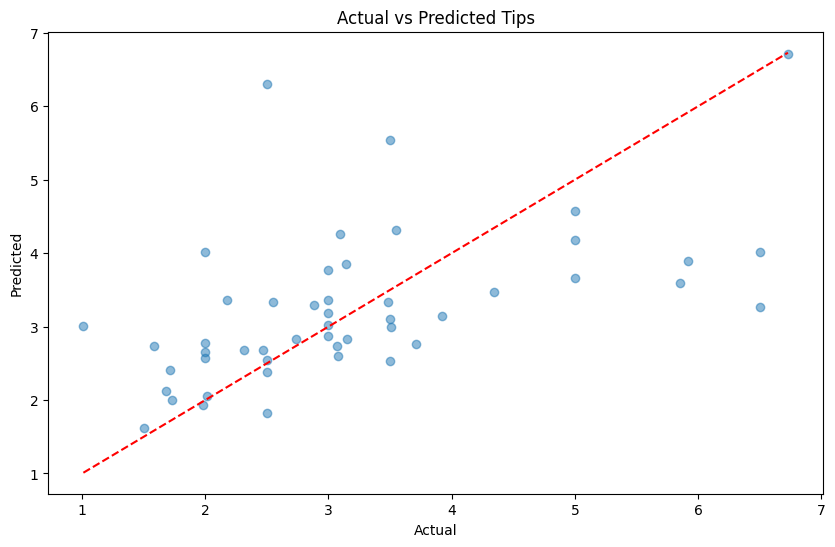

In [19]:
# Create a DataFrame to compare the actual and predicted values
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': pred})
print(comparison.tail())


plt.figure(figsize=(10, 6))
plt.scatter(y_test, pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Tips')
plt.show()